In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn color palette
color=sns.color_palette("ch:s=-.0,r=.4")


# Normalize data with respect to a reference
def Normalize_to_ref(data, ref):
    """
    Normalizes data with respect to a reference using scaling.
    
    Parameters:
    data (array-like): Input data to be normalized.
    ref (array-like): Reference data.
    
    Returns:
    array-like: Normalized data with respect to the reference.
    """
    return (data) / (ref)



### Normalized data to the reference peak

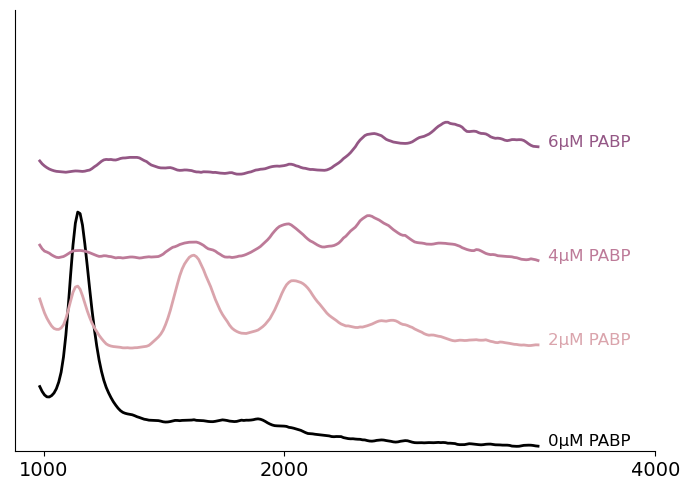

In [4]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
plt.rcParams['text.usetex'] = True
plt.style.use('default')
plt.gcf().set_size_inches(7, 5)

# Dictonary for the data to be plotted, with where the file number refers to PABP concentration.
file_dir = {
    0  : "0µM PABP",
    2  : "2µM PABP",
    4  : "4µM PABP",
    6  : "6µM PABP",
}

# Define color palette
palette = {file_nr: color[i] for i, file_nr in enumerate(file_dir.keys())}

# Tail data directory
tail = "T100"

DATA_DIR = tail + '/'

# Plot control without PABP first
control = 0 #specify the control sample (i.e.) the one with 0µM PABP
No_PABP = pd.read_csv(DATA_DIR + 'Sample_' + str(control) + '.csv',
                       skiprows=16,
                       skipfooter=1,
                       engine='python'
                      )

No_PABP_norm = No_PABP.query('18.8 <= Time <= 19.2') #specify in which range of seconds is the reference peak 
ref_peak = No_PABP_norm.Value.max() #get the max value of the reference peak
No_PABP = No_PABP.query('31.5 <= Time <= 42') #specify in which range of seconds are the sample peaks
No_PABP["Value_norm"] = Normalize_to_ref(No_PABP.Value, ref_peak) #normmalize the sample peaks to the max value of reference peak
ax.plot(No_PABP.Time, No_PABP.Value_norm, color='k', lw=2, alpha=1)

# Make one plot per PABP concentration
move = 1
for file_nr, name in file_dir.items():
    # Skip control, since that is already plotted
    if file_nr == control:
        continue
   # print(file_nr)
    electrogram = pd.read_csv(DATA_DIR + 'Sample_' + str(file_nr) + '.csv',
                               skiprows=16,
                               skipfooter=1,
                               engine='python'
                              )
    # Find reference peak of each sample
    electrogram_norm = electrogram.query('18.8 <= Time <= 19.2')
    ref_peak = electrogram_norm.Value.max()
    # Cut data to desired range
    electrogram = electrogram.query('31.5 <= Time <= 42')
    # Normalize so the reference peak is at value 1
    electrogram["Value_norm"] = Normalize_to_ref(electrogram.Value, ref_peak)
    ax.plot(electrogram.Time, electrogram.Value_norm + move, color=palette[file_nr], lw=2)
    move += 1

# Annotate lines in graph
for line, name in zip(ax.lines, file_dir.values()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1] + 0.2
    if not np.isfinite(y):
        y = next(reversed(line.get_ydata()[~line.get_ydata().mask]), float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points", fontsize=12)
    text_width = (text.get_window_extent(
        fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

# Extract location of the ladder peaks
peak_ladder = pd.read_csv(DATA_DIR + 'Ladder_peaks.csv')
ladder_ticks = peak_ladder.query("Peak_Height >= 1")
peaks = list(ladder_ticks['Aligned Migration Time [s]'])
ax.set_yticks([]) 
ax.set_ylim(0, 5)
plt.xticks(ticks=peaks[3:-1], labels=[1000, 2000, 4000], fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


### Normalize data to the highest (FU) value of each sample excluding the marker

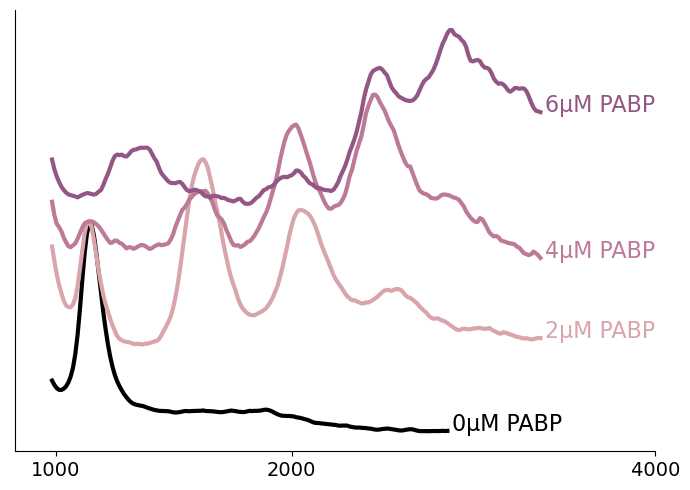

In [4]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
plt.rcParams['text.usetex'] = True
plt.style.use('default')
plt.gcf().set_size_inches(7, 5)

# Dictonary for the data to be plotted, with where the file number refers to PABP concentration.
file_dir = {
    0  : "0µM PABP",
    2  : "2µM PABP",
    4  : "4µM PABP",
    6  : "6µM PABP",
}

# Define color palette
palette = {file_nr: color[i] for i, file_nr in enumerate(file_dir.keys())}

# Tail data directory
tail = "T100"
DATA_DIR = tail + '/'

# Plot control without PABP first
control = 0 #specify the control sample (i.e.) the one with 0µM PABP

No_PABP = No_PABP.query('31.5 <= Time <= 42') #specify in which range of seconds are the peaks of the control sample excluding the reference peak
ref_peak = No_PABP.Value.max() #get the max value in the specified range
No_PABP["Value_norm"] = Normalize_to_ref(No_PABP.Value, ref_peak) #normalize the data to the highest peak
ax.plot(No_PABP.Time, No_PABP.Value_norm, color='k', lw=3, alpha=1)

# Make one plot per PABP concentration
move = 0.3
for file_nr, name in file_dir.items():
    # Skip control, since that is already plotted
    if file_nr == control:
        continue
   # print(file_nr)
    electrogram = pd.read_csv(DATA_DIR + 'Sample_' + str(file_nr) + '.csv',
                               skiprows=16,
                               skipfooter=1,
                               engine='python'
                              )
    # Find reference peak
    electrogram_norm = electrogram.query('31.5 <= Time <= 42')
    ref_peak = electrogram_norm.Value.max()
    # Cut data to desired range
    electrogram = electrogram.query('31.5 <= Time <= 42')
    # Normalize so the reference peak is at value 1
    electrogram["Value_norm"] = Normalize_to_ref(electrogram.Value, ref_peak)
    ax.plot(electrogram.Time, electrogram.Value_norm + move, color=palette[file_nr], lw=3)
    move += 0.3

# Annotate lines in graph
for line, name in zip(ax.lines, file_dir.values()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1] + 0.1
    if not np.isfinite(y):
        y = next(reversed(line.get_ydata()[~line.get_ydata().mask]), float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(name,
                       xy=(x, y),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points", fontsize=16)
    text_width = (text.get_window_extent(
        fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

# Extract location of the ladder peaks
peak_ladder = pd.read_csv(DATA_DIR + 'Ladder_peaks.csv')
ladder_ticks = peak_ladder.query("Peak_Height >= 1")
peaks = list(ladder_ticks['Aligned Migration Time [s]'])
ax.set_yticks([]) 
ax.set_xlim(30.7, 40)
#ax.set_ylim(0, 2.5)
plt.xticks(ticks=peaks[3:-1], labels=[1000, 2000, 4000], fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()